<a href="https://colab.research.google.com/github/mo3az-14/Indian_Birds_classification/blob/main/Indian_birds_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is made for classifying diffrent kinds of birds found in India. The original dataset contains 25 diffrent kinds of birds with 22k images but here I will only use a small part of this data .I will be using only 3 kinds of birds. Maybe later on I will do another one on actually the whole dataset!     
-oringinal dataset https://www.kaggle.com/datasets/arjunbasandrai/25-indian-bird-species-with-226k-images

#0-Imports and device agonsitc code

In [ ]:
import torch
from torch import nn

In [ ]:
#setting up device agonstic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
!nvidia-smi

Sun Apr 16 03:12:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#1-Getting the dataset from kaggle dataset

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!mv ./kaggle.json ~/.kaggle/

mv: cannot stat './kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d moaaztarik/indian-birds-5-types

indian-birds-5-types.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q /content/indian-birds-5-types.zip -d /content/Dataset

In [ ]:
!rm -rf "/content/Dataset/mini_set/Common Myna/.ipynb_checkpoints"

In [ ]:
!rm -rf '/content/Dataset/mini_set/.ipynb_checkpoints'

#2-preparing data and making dataloaders

In [ ]:
from pathlib import Path
image_source_folder= Path(r"/content/Dataset/mini_set")

In [ ]:
import os
def walk_dir(dir_name): 
  total_files = 0
  for path , dir_name,file_name in os.walk(dir_name):
    print(f"there are {len(dir_name)} directories and {len(file_name)} files in '{path}'")
    total_files+= len(file_name)
  print(f"The total number of files is {total_files}")

In [ ]:
walk_dir(image_source_folder)

there are 3 directories and 0 files in '/content/Dataset/mini_set'
there are 0 directories and 930 files in '/content/Dataset/mini_set/White-Breasted Waterhen'
there are 0 directories and 922 files in '/content/Dataset/mini_set/Indian Grey Hornbill'
there are 0 directories and 926 files in '/content/Dataset/mini_set/Indian Roller'
The total number of files is 2778


##2.1 making a seperate folder for train and test

In [ ]:
! pip install split-folders 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
try : 
  splitfolders.ratio(image_source_folder, output="train_test",seed=3, ratio=(0.8, 0.2),
                     group_prefix=None, move=True)
except : 
  print("file already exists")
try : 
  os.rename("/content/train_test/val","/content/train_test/test"   )
except : 
  print("directories are correctly named")

Copying files: 1 files [00:00, 76.90 files/s]

file already exists
directories are correctly named


In [ ]:
!rm -rf Dataset

In [ ]:
train_path = Path("train_test/train")
test_path = Path("train_test/test")
train_path , test_path 

(PosixPath('train_test/train'), PosixPath('train_test/test'))

In [ ]:
!rm -rf /content/train_test/train/val
!rm -rf /content/train_test/train/train
!rm -rf /content/train_test/train/test
!rm -rf /content/train_test/test/train
!rm -rf /content/train_test/test/val

In [ ]:
!rm -rf /content/train_test/train/.ipynb_checkpoints

##2.2 some data visiualization

In [ ]:
image_source_folder = Path("/content/train_test")

getting some random images for exploration

[PosixPath('/content/train_test/test/White-Breasted Waterhen/ML283160851.jpg'), PosixPath('/content/train_test/test/White-Breasted Waterhen/ML56121291.jpg'), PosixPath('/content/train_test/test/White-Breasted Waterhen/ML360042031.jpg'), PosixPath('/content/train_test/test/White-Breasted Waterhen/ML191995001.jpg'), PosixPath('/content/train_test/test/White-Breasted Waterhen/ML238078431.jpg'), PosixPath('/content/train_test/test/White-Breasted Waterhen/ML357183791.jpg'), PosixPath('/content/train_test/test/White-Breasted Waterhen/ML234772271.jpg'), PosixPath('/content/train_test/test/White-Breasted Waterhen/ML295106361.jpg'), PosixPath('/content/train_test/test/White-Breasted Waterhen/ML205591731.jpg'), PosixPath('/content/train_test/test/White-Breasted Waterhen/ML227828781.jpg'), PosixPath('/content/train_test/test/White-Breasted Waterhen/ML343088401.jpg'), PosixPath('/content/train_test/test/White-Breasted Waterhen/ML207945611.jpg'), PosixPath('/content/train_test/test/White-Breasted W

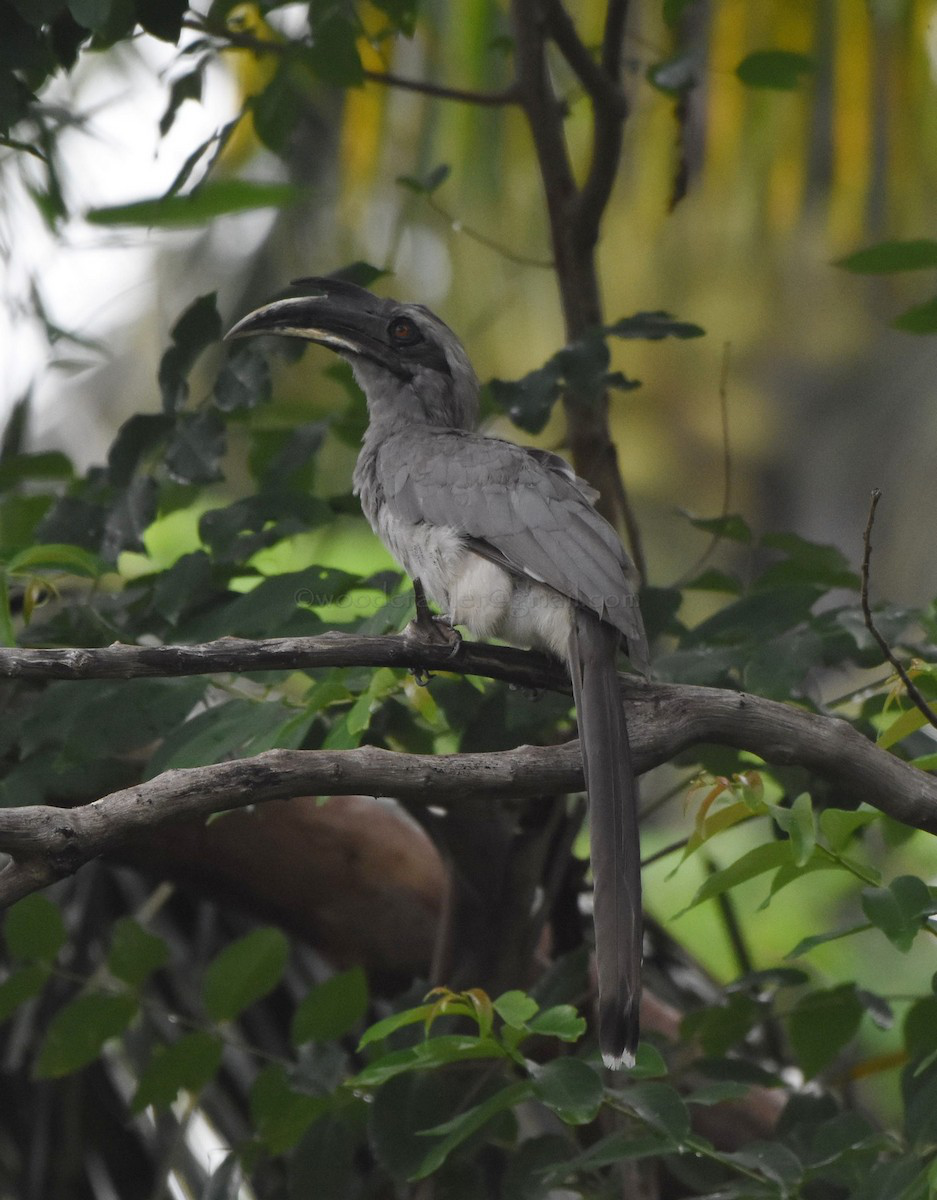

In [ ]:
import random
#import cv2
from PIL import Image
#random.seed(123)
#putting all paths in a list
image_path_list = list(image_source_folder.glob("*/*/*.jpg"))
print(image_path_list)
random_image_path = random.choice(image_path_list)

#getting image class from the directory name
image_class = random_image_path.parent.stem

#opening the image with pillow
rnd_img = Image.open(random_image_path)

#printing some data about the picture
print(f"Image height is {rnd_img.height}")
print(f"Image width is {rnd_img.width}")
print(f"Image class is {image_class}")
rnd_img

(-0.5, 936.5, 1199.5, -0.5)

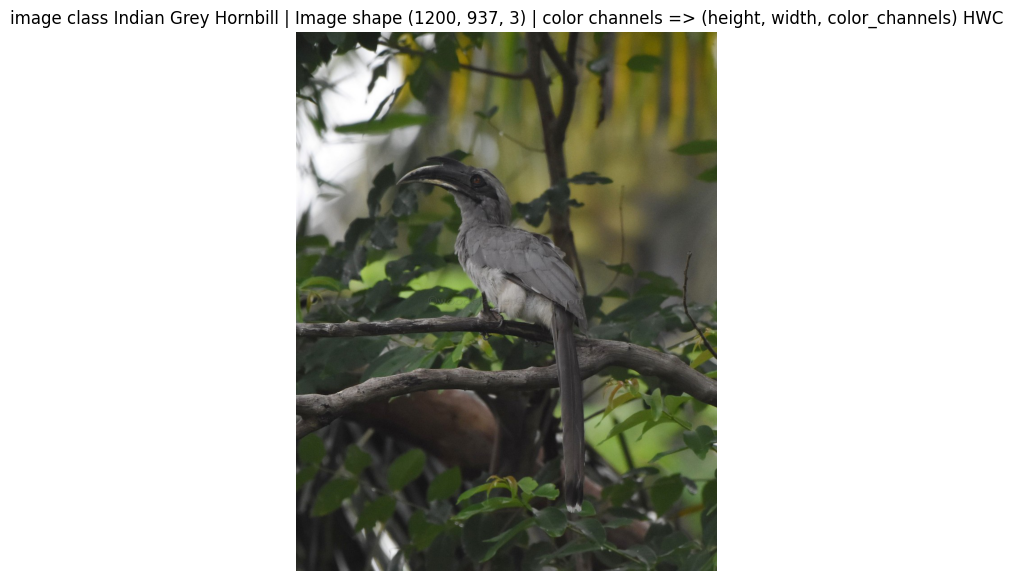

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#random image to an numpy array
rnd_img_as_array = np.asarray(rnd_img)

#plotting the image using matplotlib
plt.figure(figsize=(10,7))
plt.imshow(rnd_img_as_array)
plt.title(f"image class {image_class} | Image shape {rnd_img_as_array.shape} | color channels => (height, width, color_channels) HWC")
plt.axis(False)

Applying transformations for the data
1. resizing to (244,244) since the effecientnet architechture uses this size
2. applying trivial Augment
3. turning them into tensors to be used in our model
4. Normalizing the data according to the pytorch Documentation

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets 
from torchvision import transforms

data_transforms = transforms.Compose([
    transforms.Resize(size=(244,244)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

visiualizing some transformed images

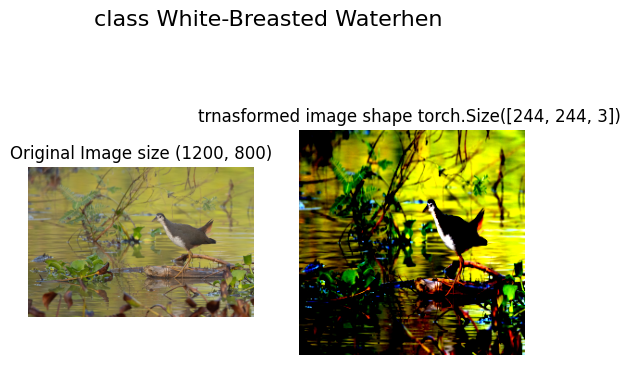

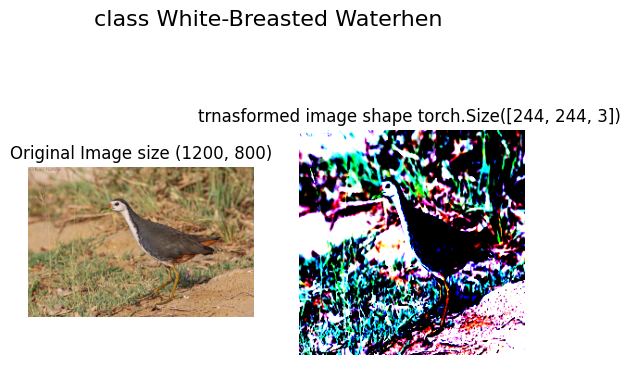

In [ ]:
def plot_transformed_images(image_paths:list , transform , n=3 , seed =None ):
  if seed: 
    random.seed(seed)
  for img_path in image_paths: 
    with Image.open(img_path) as f:
      fig ,ax  =plt.subplots(nrows= 1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original Image size {f.size}")
      ax[0].axis("off")

      #transform the image 
      trans_img = transform(f).permute(1,2,0)
      ax[1].imshow(trans_img)
      ax[1].set_title(f"trnasformed image shape {trans_img.shape } ")
      ax[1].axis(False)
      fig.suptitle(f"class {img_path.parent.stem}" , fontsize =16)

plot_transformed_images(image_paths=image_path_list[:2] , transform = data_transforms , n =4 )

In [ ]:
from torchvision import datasets
train_data= datasets.ImageFolder(root=train_path , 
                                transform = data_transforms ,
                                 target_transform=None  )
test_data = datasets.ImageFolder(root = test_path,
                                 transform= data_transforms,
                                )

In [ ]:
train_data

Dataset ImageFolder
    Number of datapoints: 2221
    Root location: train_test/train
    StandardTransform
Transform: Compose(
               Resize(size=(244, 244), interpolation=bilinear, max_size=None, antialias=warn)
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
class_names = train_data.classes
class_names

['Indian Grey Hornbill', 'Indian Roller', 'White-Breasted Waterhen']

##2.3Making data loaders

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32 
train_dataloader =DataLoader(
    dataset = train_data,
    batch_size= BATCH_SIZE,
    num_workers=os.cpu_count(),
    shuffle = True 

) 
test_dataloader=DataLoader(
    dataset = test_data,
    batch_size= BATCH_SIZE,
    num_workers=os.cpu_count(),
    shuffle = False 
) 
train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fe5ec821b20>,
 <torch.utils.data.dataloader.DataLoader at 0x7fe5ec821e80>)

In [ ]:
img , label = next(iter(train_dataloader))
print(f"input shape of images = {img.shape} | output_shape ={len(class_names)} ")

input shape of images = torch.Size([32, 3, 244, 244]) | output_shape =3 


#3- Using pre-trained model EFFICIENTNET_B0 

##3.1 Importing the pre-trained model

*   Importing model 
*   Using default weights because usually it's has the best performance



In [ ]:
import torchvision.models as models
weights =models.EfficientNet_B0_Weights.DEFAULT
model_B0 = models.efficientnet_b0(weights= weights).to(device)

In [ ]:
#library for getting the summary of our models
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchinfo import summary
summary(model=model_B0, 
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

/usr/local/lib/python3.9/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.9/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [ ]:
#Freezing the feature extraction layers
for param in model_B0.features.parameters():
  param.requires_grad=False

In [ ]:
class_names

['Indian Grey Hornbill', 'Indian Roller', 'White-Breasted Waterhen']

###3.1.1 replacing the classifier layer with our own

In [ ]:
#changing the classifier layer to our own output shape
output_shape = len(class_names)
model_B0.classifier= torch.nn.Sequential(
    torch.nn.Dropout(p=0.45,inplace = True),
    torch.nn.Linear(in_features= 1280, 
                    out_features = output_shape,
                    bias = True).to(device)
)

In [ ]:
summary(model = model_B0 , 
        input_size=(32,3,244,244),
        verbose = 0,
        col_names = ["input_size" , "output_size" , "num_params" , "trainable"],
        col_width=20,
        row_settings=["var_names"])


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 244, 244]    [32, 3]              --                   Partial
├─Sequential (features)                                      [32, 3, 244, 244]    [32, 1280, 8, 8]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 244, 244]    [32, 32, 122, 122]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 244, 244]    [32, 32, 122, 122]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 122, 122]   [32, 32, 122, 122]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 122, 122]   [32, 32, 122, 122]   --                   --
│    └─Sequential (1)                                        [32, 32, 122, 122]   [32, 

###3.1.2 creating some helper functions for training

In [ ]:
from tqdm.auto import tqdm
from typing import Dict, List, Tuple

#training step function
def train_step (model:torch.nn.Module , 
                dataloader:torch.utils.data.DataLoader,
                optimizer: torch.optim.Optimizer,
                loss_fn: torch.nn,
                device:torch.device,
                scheduler :torch.optim.lr_scheduler.ReduceLROnPlateau=None)->Tuple[float,float]:
  #putting model in trainig mode
  model.train()
  #intializing accumlative loss
  train_loss,train_acc=0,0
  for batch , (X,y) in enumerate(dataloader): 
    X,y = X.to(device) , y.to(device)
    
    #forward pass
    y_pred=model(X)

    #loss 
    loss = loss_fn(y_pred,y)
    train_loss+=loss.item()

    #optimizer
    optimizer.zero_grad()

    #back prop
    loss.backward()

    #step
    optimizer.step()

    #getting the accuracy
    #getting the classes of the predictions
    y_pred_classes = torch.argmax(torch.softmax(y_pred,dim=1), dim=1)
    #comparing predictions to labels and getting the average of them
    train_acc+=(y_pred_classes==y).sum().item()/len(y_pred)

  #adjust metrics to get the average loss and accuracy per batch
  train_loss/= len(dataloader)
  train_acc/= len(dataloader)
  
  #learning rate scheduler
  if(scheduler): 
      scheduler.step(train_loss)
  return train_acc , train_loss

# Test step function 
def test_step (
    model : torch.nn.Module,
    dataloader:torch.utils.data.DataLoader,
    loss_fn: torch.nn,
    device:torch.device
    ):
  model.eval()
  test_loss, test_acc=0,0

  with torch.inference_mode():
    for batch,(X,y) in enumerate(dataloader): 
      X,y = X.to(device) ,y.to(device)
      test_pred_logits = model(X)
      loss = loss_fn(test_pred_logits, y)
      test_loss+= loss.item()
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
  
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_acc, test_loss

def train (
    model:torch.nn.Module,
    optimizer:torch.optim.Optimizer,
    loss_fn : torch.nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    test_dataloader: torch.utils.data.DataLoader,
    epochs:int,
    device:torch.device, 
    scheduler :torch.optim.lr_scheduler = None):
  print(f"device is {device}")
  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
    }
  for epoch in tqdm(range(epochs)): 
    train_acc,train_loss  = train_step(model=model_B0,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device,
                                          scheduler = scheduler)
    test_acc , test_loss = test_step(model=model_B0,
                                   dataloader=test_dataloader,
                                   loss_fn= loss_fn,
                                    device=device ,
                                    )
    print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f} | "
          f"LR : {optimizer.param_groups[0]['lr']} " 
      )

    # Update results 
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  return results

##3.2 training the model

In [ ]:
from timeit import default_timer as timer 
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
EPOCH = 10
loss_fn = torch.nn.CrossEntropyLoss()
optimizer=optim.Adam(model_B0.parameters() , lr=1e-3)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer ,patience=2 , verbose = True )
time_on_cuda_s =timer() 
results= train(model=model_B0,
               optimizer=optimizer,
               loss_fn = loss_fn,
               train_dataloader = train_dataloader,
               test_dataloader=test_dataloader,
               device = device,
               epochs=EPOCH ,
              scheduler = scheduler)
time_on_cuda_e =timer()
print(f"[INFO] Total training time: {time_on_cuda_e-time_on_cuda_s:.3f} seconds")

device is cuda


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5842 | train_acc: 0.8159 | test_loss: 0.2961 | test_acc: 0.9028 | LR : 0.001 
Epoch: 2 | train_loss: 0.3314 | train_acc: 0.8955 | test_loss: 0.2432 | test_acc: 0.9271 | LR : 0.001 
Epoch: 3 | train_loss: 0.2864 | train_acc: 0.9062 | test_loss: 0.1943 | test_acc: 0.9358 | LR : 0.001 
Epoch: 4 | train_loss: 0.2473 | train_acc: 0.9177 | test_loss: 0.1989 | test_acc: 0.9271 | LR : 0.001 
Epoch: 5 | train_loss: 0.2475 | train_acc: 0.9094 | test_loss: 0.2050 | test_acc: 0.9288 | LR : 0.001 
Epoch: 6 | train_loss: 0.2470 | train_acc: 0.9118 | test_loss: 0.1769 | test_acc: 0.9306 | LR : 0.001 
Epoch: 7 | train_loss: 0.2308 | train_acc: 0.9116 | test_loss: 0.1649 | test_acc: 0.9323 | LR : 0.001 
Epoch: 8 | train_loss: 0.2329 | train_acc: 0.9112 | test_loss: 0.1534 | test_acc: 0.9531 | LR : 0.001 
Epoch: 9 | train_loss: 0.1984 | train_acc: 0.9270 | test_loss: 0.1614 | test_acc: 0.9419 | LR : 0.001 
Epoch: 10 | train_loss: 0.2203 | train_acc: 0.9212 | test_loss: 0.1474 | 

we managed to get 94.79% on accuracy on the test set and 92.12% on the training set with 10 after 10 loops of training and a 0.001 learning rate which is the default learining rate on the pytorch website: https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#adam.  
Note: 10 loops took 13 minutes of trainig while the SOTA that the pytorch blog post (https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/)  used was 90 but we can't really do that.


##

##3.3 visualizing loss and accuracy curves

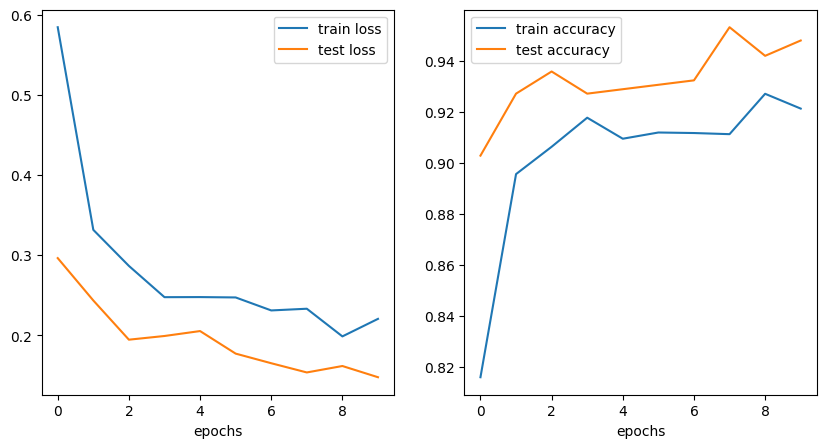

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(EPOCH) ,results["train_loss"] , label="train loss")
plt.plot(range(EPOCH) , results["test_loss" ], label ="test loss")
plt.xlabel("epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(EPOCH) , results["train_acc"] , label = "train accuracy")
plt.plot(range(EPOCH) , results["test_acc"] , label = "test accuracy")
plt.xlabel("epochs")
plt.legend()
plt.show()


##3.4 plotting confusion matrix

In [ ]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 73.9 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [ ]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_B0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_B0(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/18 [00:00<?, ?it/s]

In [ ]:
test_data.targets=torch.tensor(test_data.targets)

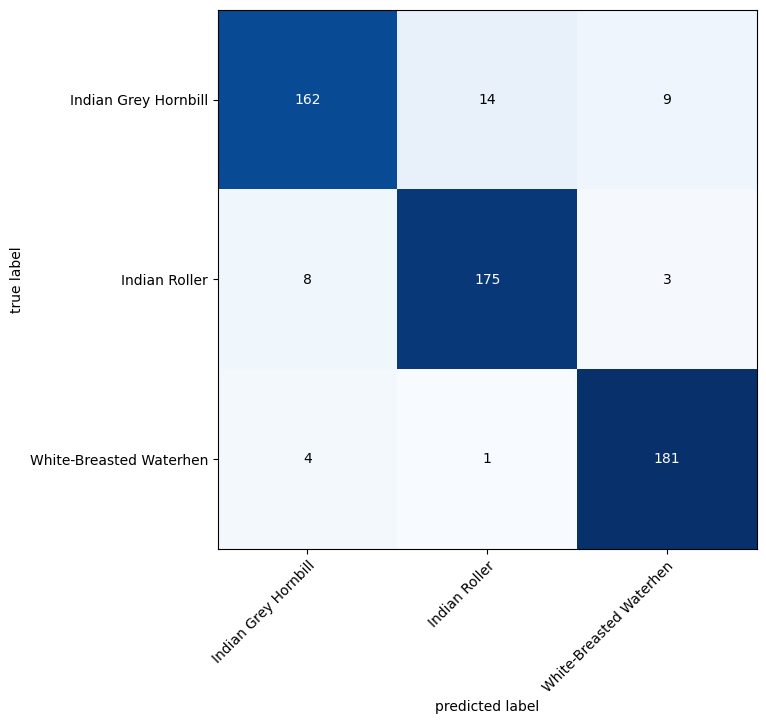

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), 
    class_names=class_names, 
    figsize=(10, 7)
);

#4-saving model

In [ ]:
def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):
  # Create target directory
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok=True)

  # Create model save path
  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
  model_save_path = target_dir_path / model_name

  # Save the model state_dict()
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(),
             f=model_save_path)

In [ ]:
save_model(model=model_B0 , target_dir = "/content/model_B0" , model_name="effecinetnetB0.pt")

[INFO] Saving model to: /content/model_B0/effecinetnetB0.pt
